### Домашнее задание

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).

2. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?


In [4]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [5]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return (x)*(1 - (x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

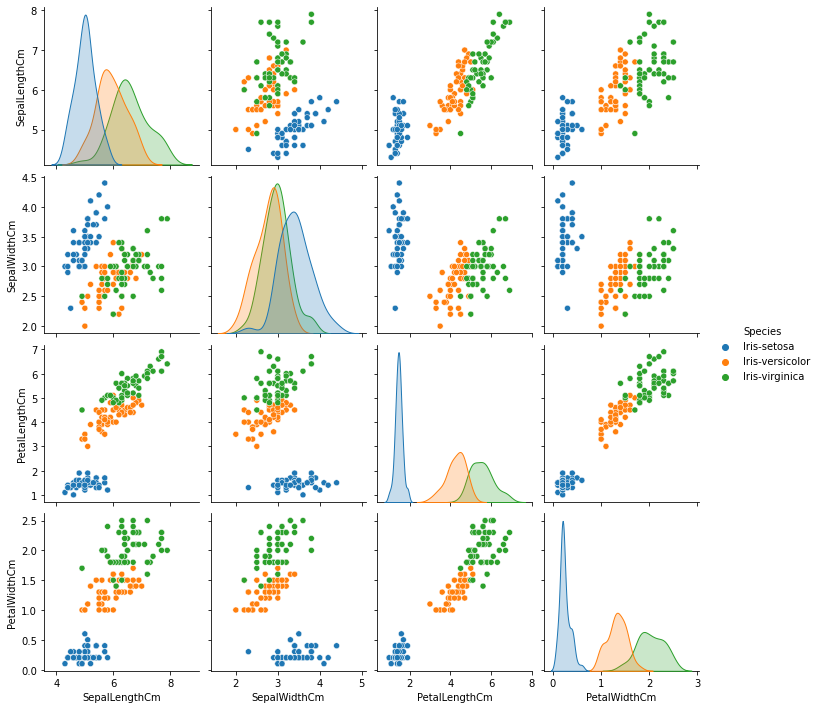

In [6]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
#print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
#plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
#x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
#y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [7]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [34]:
### Шаг 3. Обученние нейронной сети

def fit(neuron_numb=2, n=0.05, epochs=10000):

    # присваевание случайных весов
    w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

    # массив для ошибок, чтобы потом построить график
    errors = []

    # процесс обучения
    for i in range(epochs):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)
        # коррекция
        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n
        # метрика модели
        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100
        
    return errors, accuracy, layer2, w0, w1


def demonstration(errors, accuracy, layer2):
    ### Шаг 4. Демонстрация полученных результатов
    # черчение диаграммы точности в зависимости от обучения
    plt.figure(figsize = (16,5))
    plt.plot(errors)
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')
    plt.grid()
    plt.show() # расскоментируйте, чтобы посмотреть 

    N = 50
    plt.figure(figsize = (16,5))
    plt.plot(layer2[:N,1], 'r',label = 'Y new')
    plt.plot(y_train[:N,1],'g', label = 'Y train')
    plt.xlabel('№ примера')
    plt.ylabel('выход сети и целевой')
    plt.legend( )
    plt.grid()
    plt.show() # расскоментируйте, чтобы посмотреть 

    print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")
    
def predict(X_test, w0, w1):
    # прямое распространение(feed forward)
    layer0_t = X_test
    layer1_t = sigmoid(np.dot(layer0_t, w0))
    layer2_t = sigmoid(np.dot(layer1_t, w1))
    layer2_error_t = y_test - layer2_t


    N = 50
    plt.figure(figsize = (16,5))
    plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
    plt.plot(y_test[:N,1],'g', label = 'Y train')
    plt.xlabel('№ примера')
    plt.ylabel('выход сети и целевой')
    plt.grid()
    plt.legend( )
    plt.show() # расскоментируйте, чтобы посмотреть

    # метрика модели
    error_t = np.mean(np.abs(layer2_error_t))
    accuracy_t = (1 - error_t) * 100
    print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")    

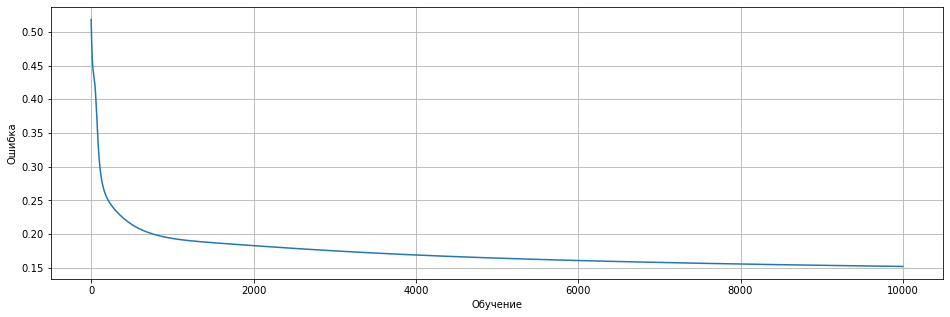

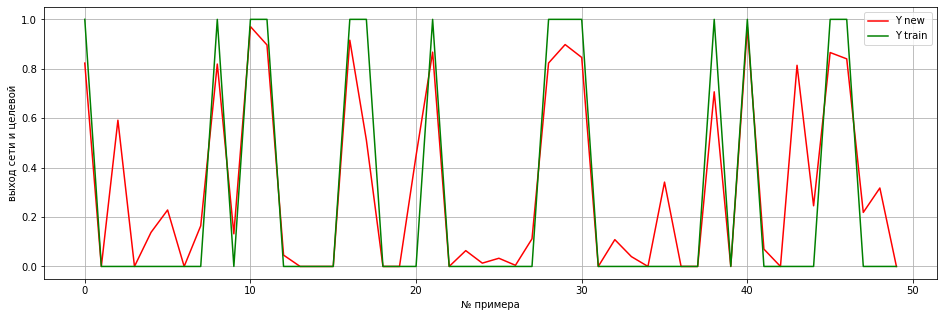

Аккуратность нейронной сети 84.82%


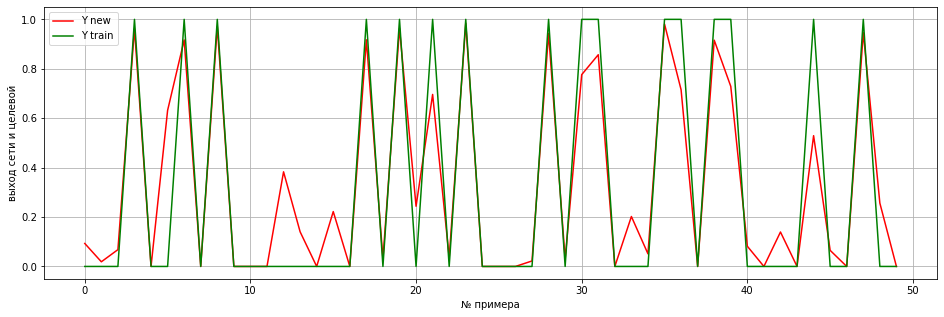

Аккуратность нейронной сети на тесте 83.94%


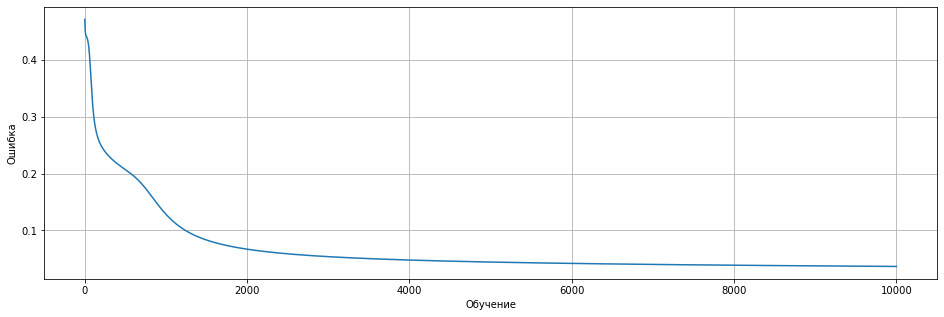

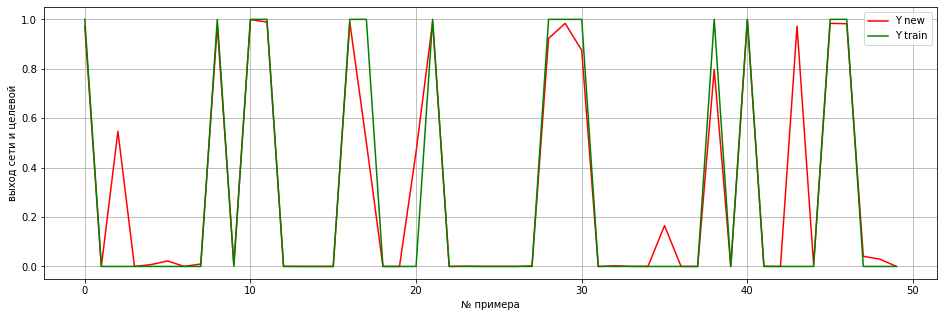

Аккуратность нейронной сети 96.32%


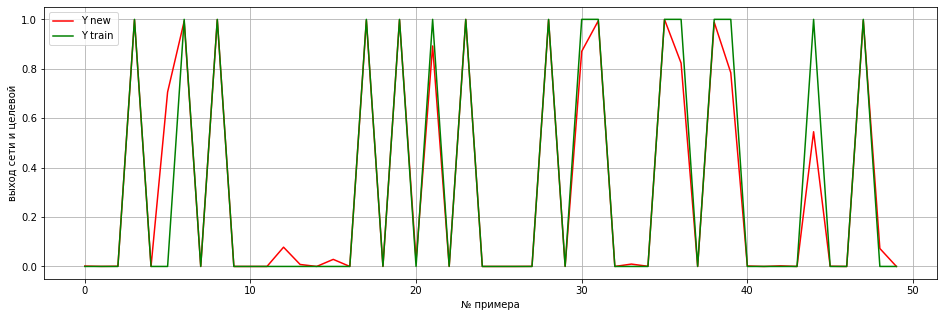

Аккуратность нейронной сети на тесте 96.49%


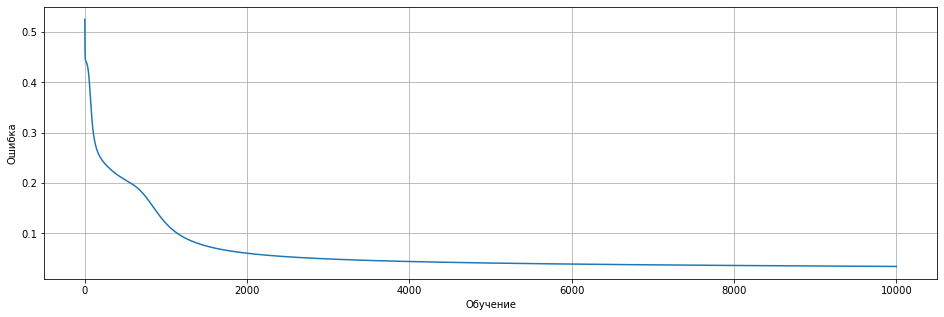

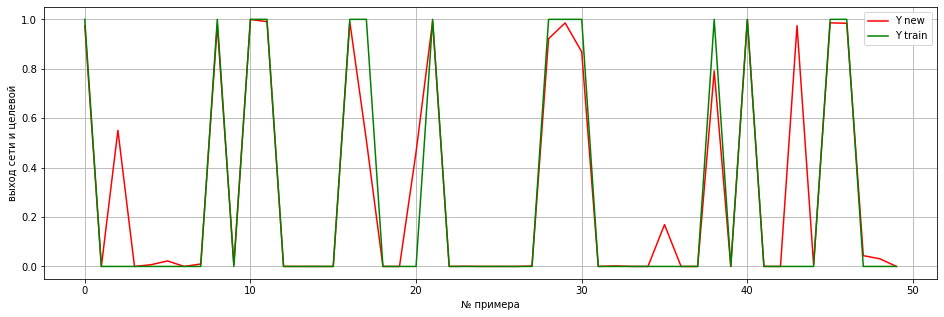

Аккуратность нейронной сети 96.54%


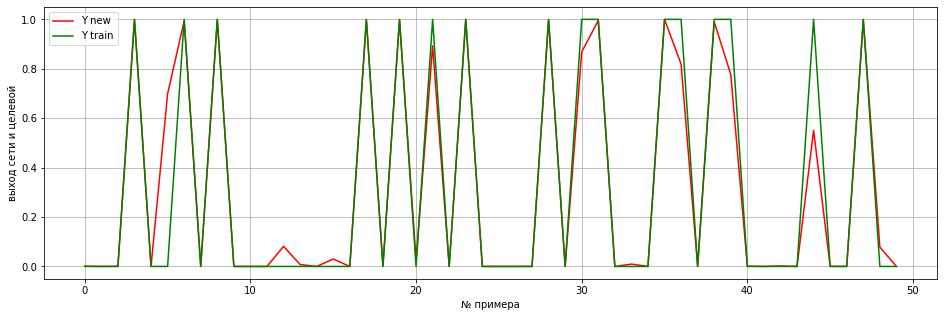

Аккуратность нейронной сети на тесте 96.67%


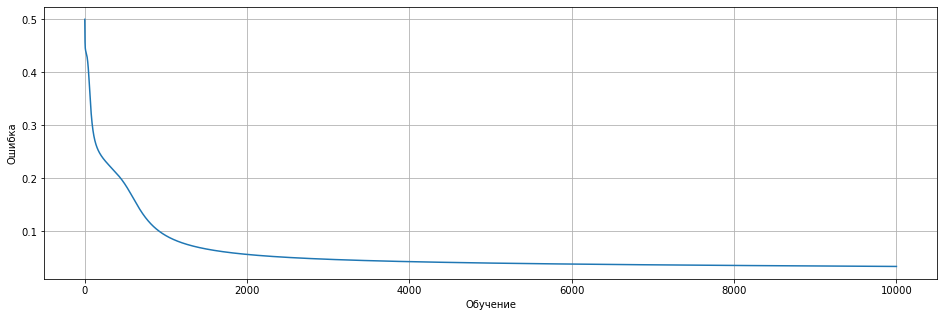

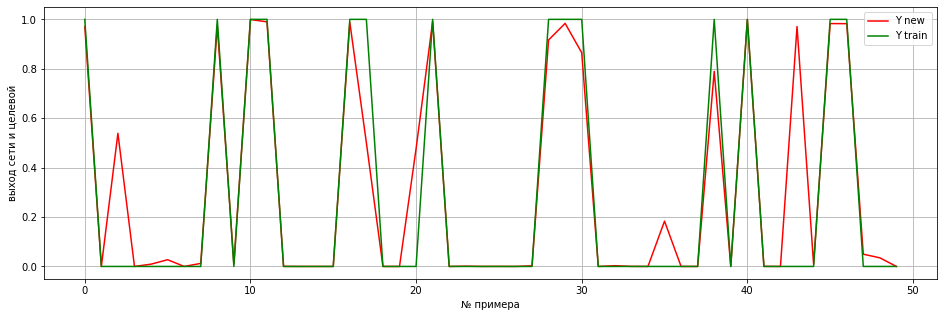

Аккуратность нейронной сети 96.59%


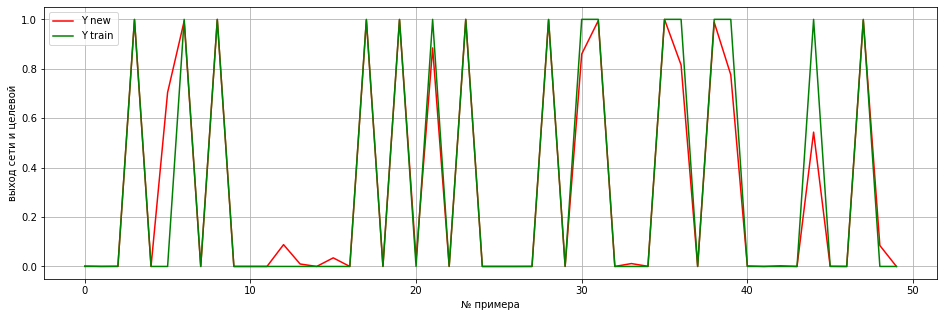

Аккуратность нейронной сети на тесте 96.71%


In [39]:
errors, accuracy, layer2, w0, w1 = fit(2, 0.05, 10000)
demonstration(errors, accuracy, layer2)

predict(X_test, w0, w1)

errors, accuracy, layer2, w0, w1 = fit(3, 0.05, 10000)
demonstration(errors, accuracy, layer2)

predict(X_test, w0, w1)

errors, accuracy, layer2, w0, w1 = fit(4, 0.05, 10000)
demonstration(errors, accuracy, layer2)

predict(X_test, w0, w1)

errors, accuracy, layer2, w0, w1 = fit(5, 0.05, 10000)
demonstration(errors, accuracy, layer2)

predict(X_test, w0, w1)

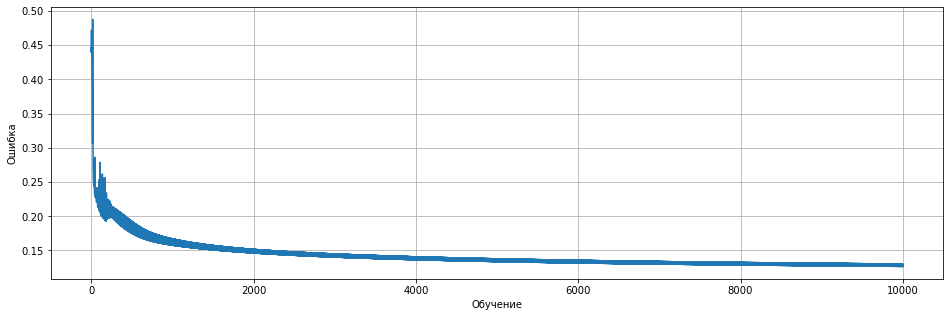

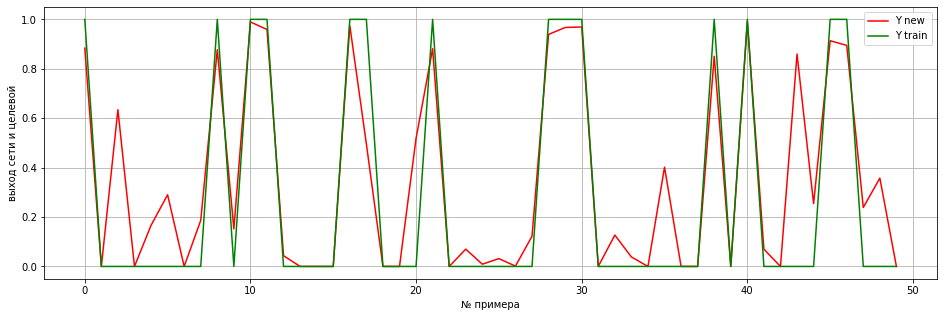

Аккуратность нейронной сети 87.35%


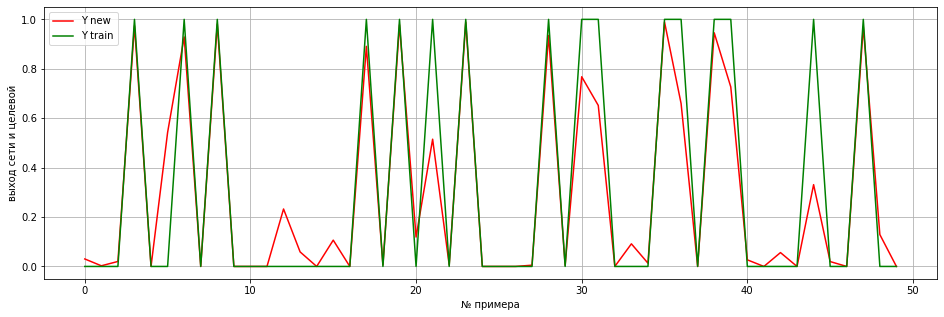

Аккуратность нейронной сети на тесте 85.74%


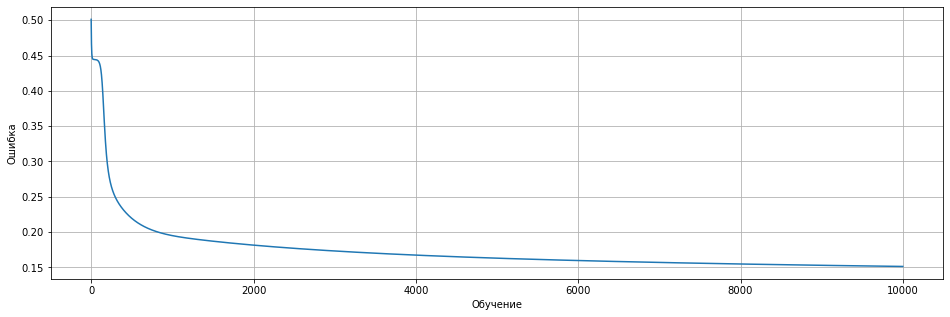

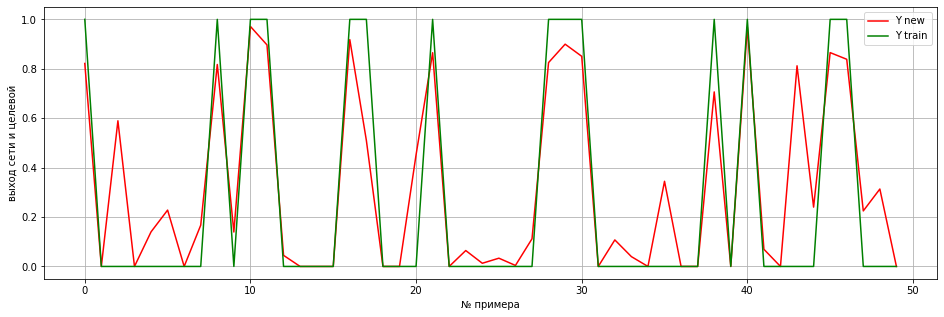

Аккуратность нейронной сети 84.86%


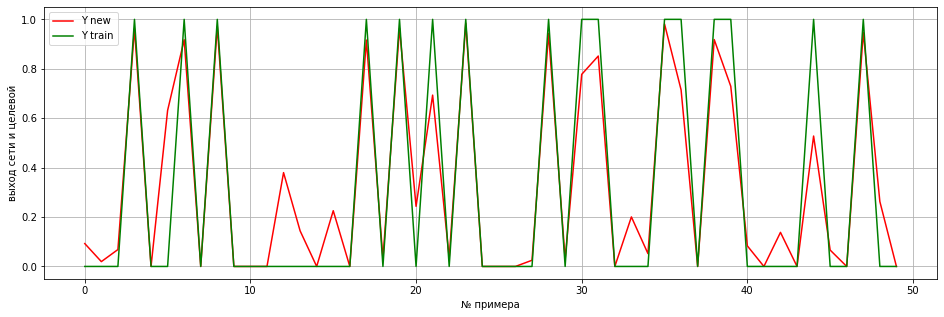

Аккуратность нейронной сети на тесте 83.96%


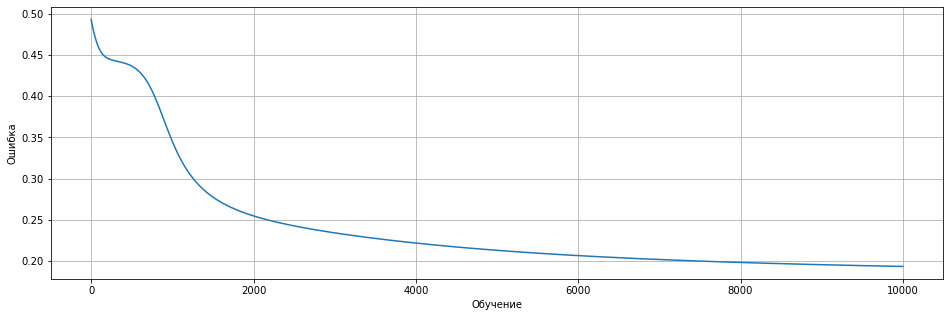

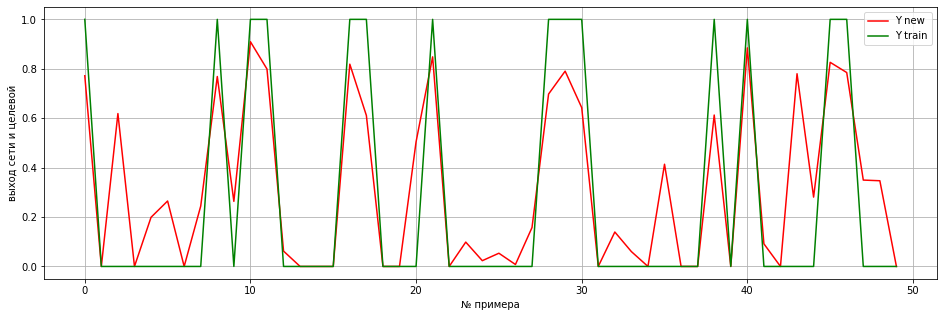

Аккуратность нейронной сети 80.66%


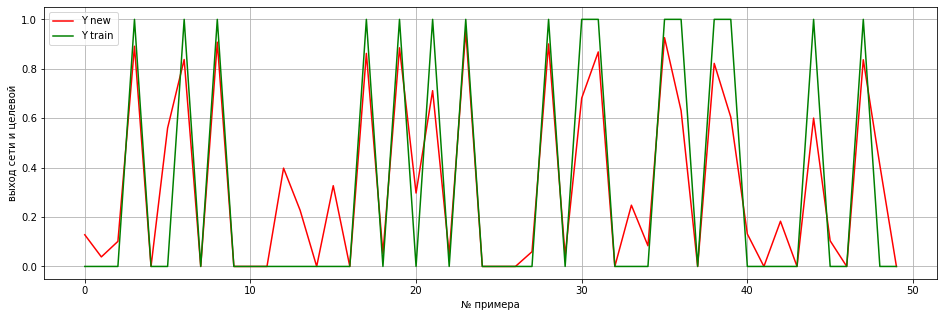

Аккуратность нейронной сети на тесте 80.28%


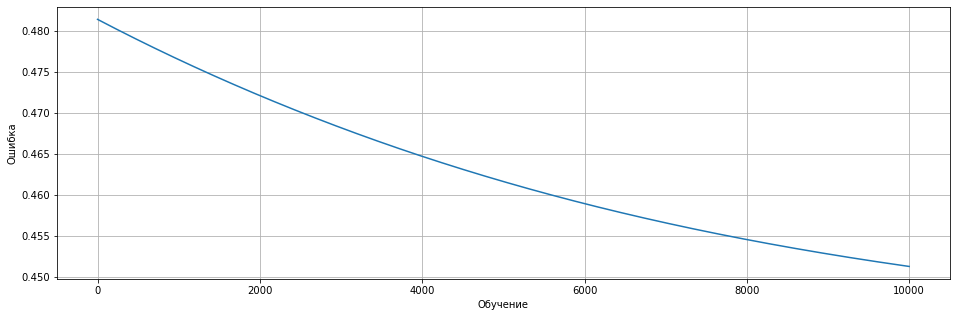

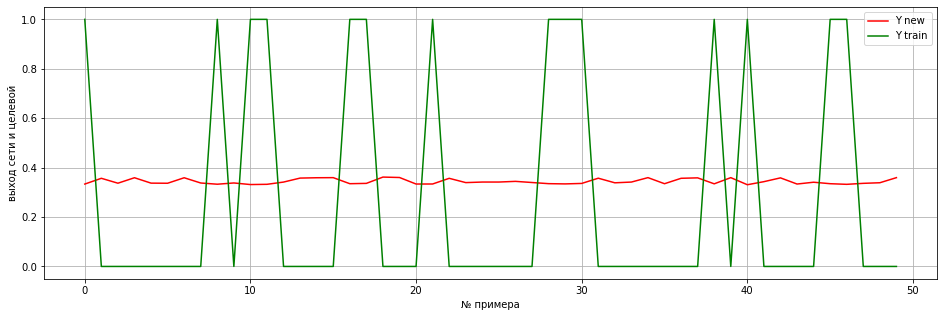

Аккуратность нейронной сети 54.87%


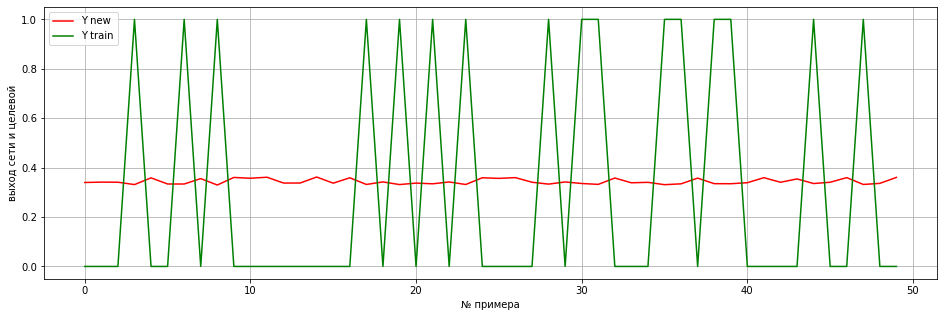

Аккуратность нейронной сети на тесте 54.89%


In [41]:
errors, accuracy, layer2, w0, w1 = fit(2, 0.5, 10000)
demonstration(errors, accuracy, layer2)

predict(X_test, w0, w1)

errors, accuracy, layer2, w0, w1 = fit(2, 0.05, 10000)
demonstration(errors, accuracy, layer2)

predict(X_test, w0, w1)

errors, accuracy, layer2, w0, w1 = fit(2, 0.005, 10000)
demonstration(errors, accuracy, layer2)

predict(X_test, w0, w1)

errors, accuracy, layer2, w0, w1 = fit(2, 0.00005, 10000)
demonstration(errors, accuracy, layer2)

predict(X_test, w0, w1)

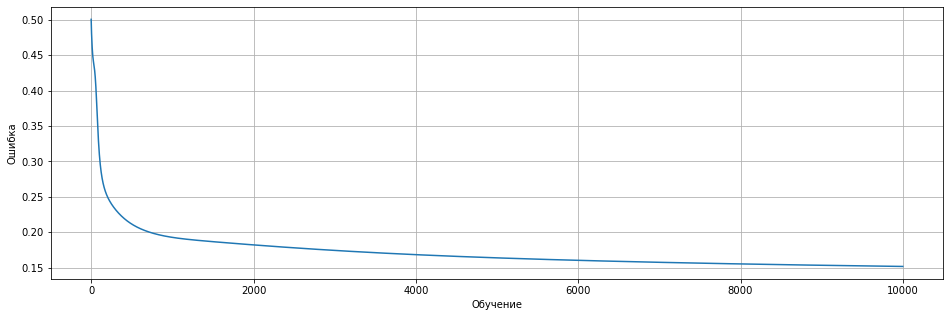

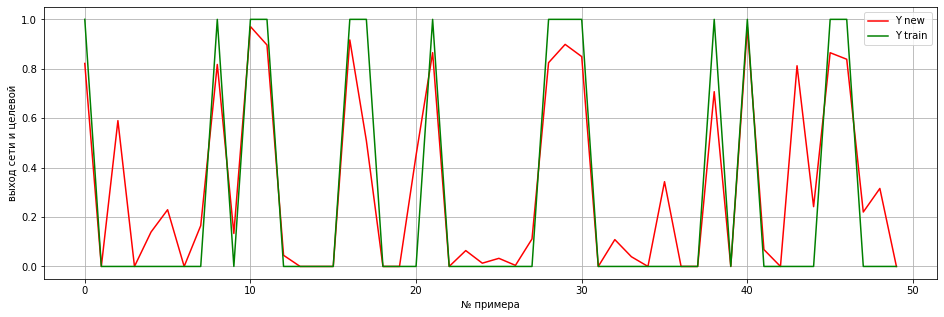

Аккуратность нейронной сети 84.84%


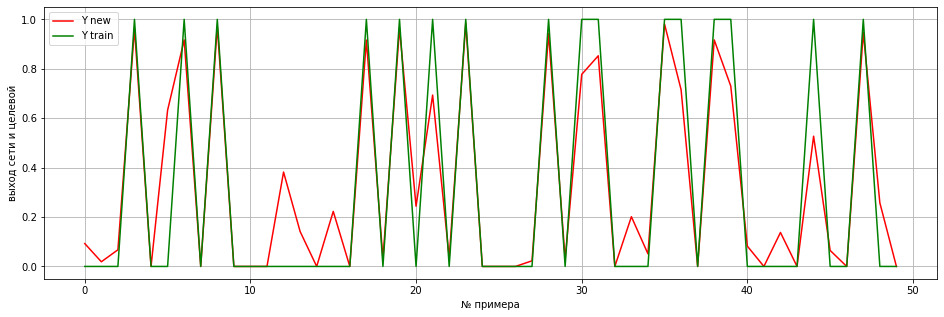

Аккуратность нейронной сети на тесте 83.95%


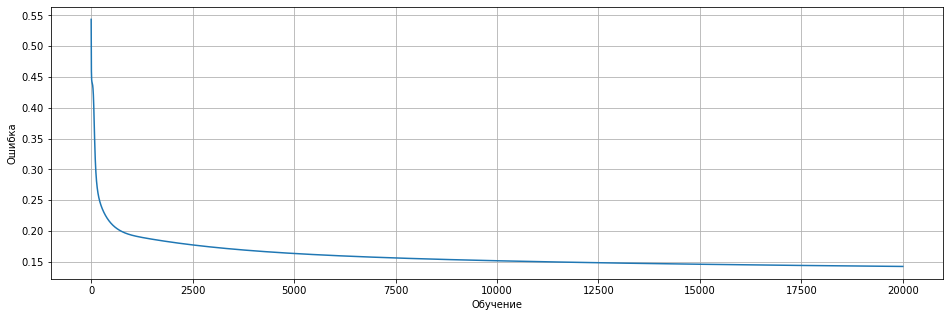

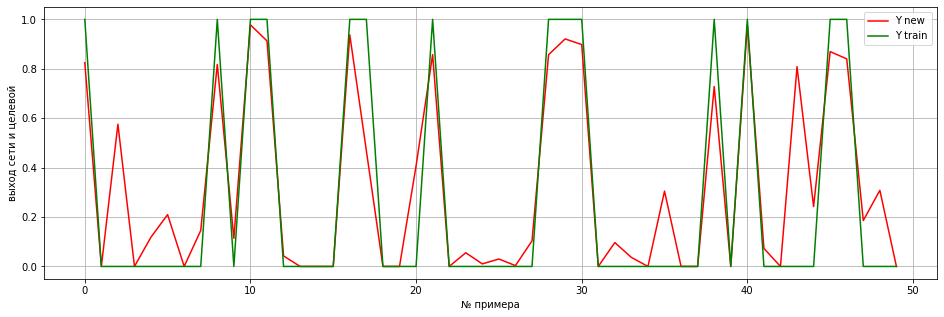

Аккуратность нейронной сети 85.77%


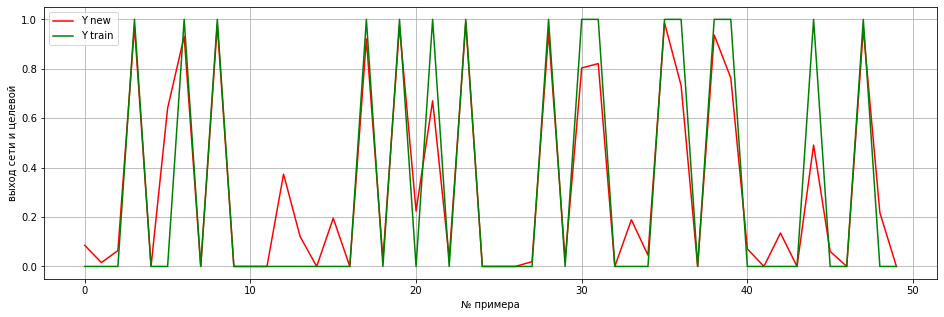

Аккуратность нейронной сети на тесте 84.75%


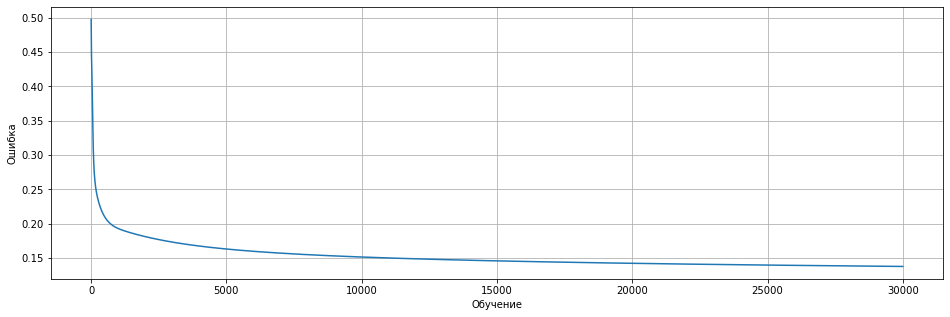

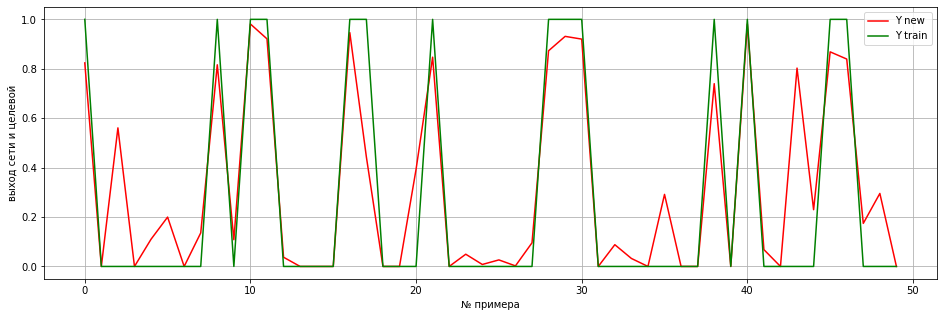

Аккуратность нейронной сети 86.24%


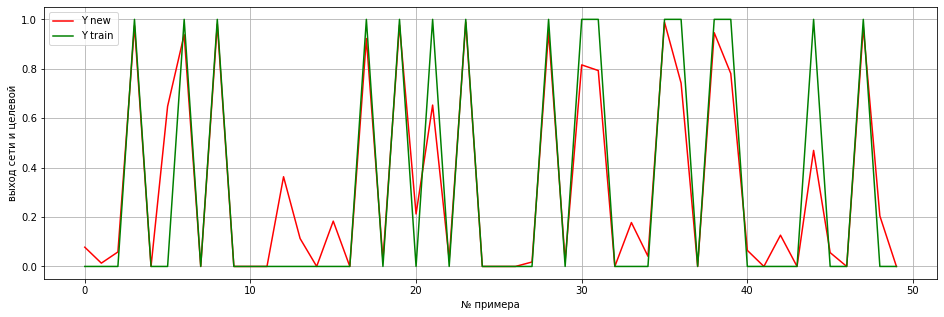

Аккуратность нейронной сети на тесте 85.15%


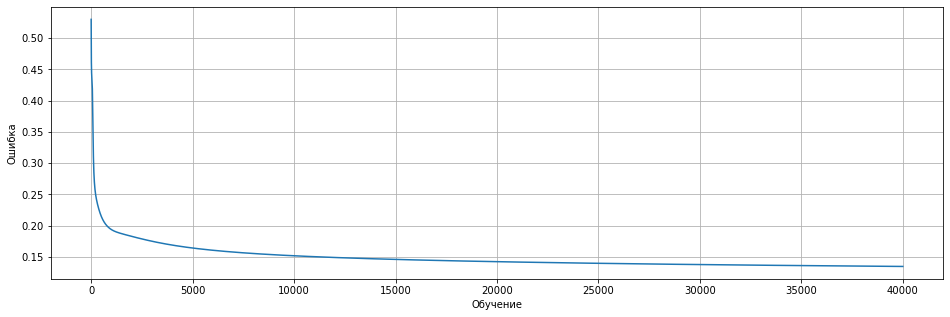

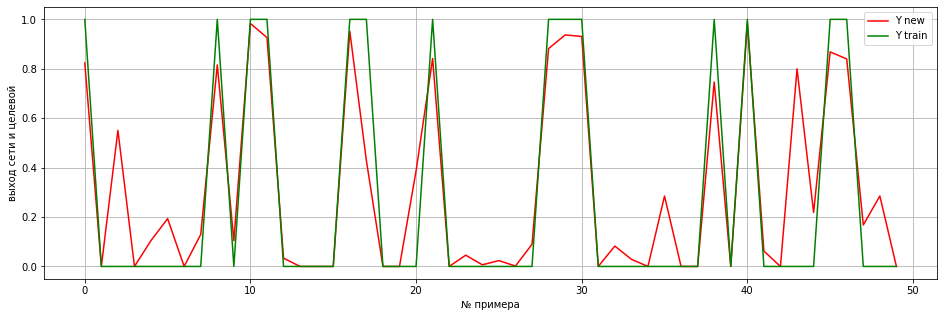

Аккуратность нейронной сети 86.52%


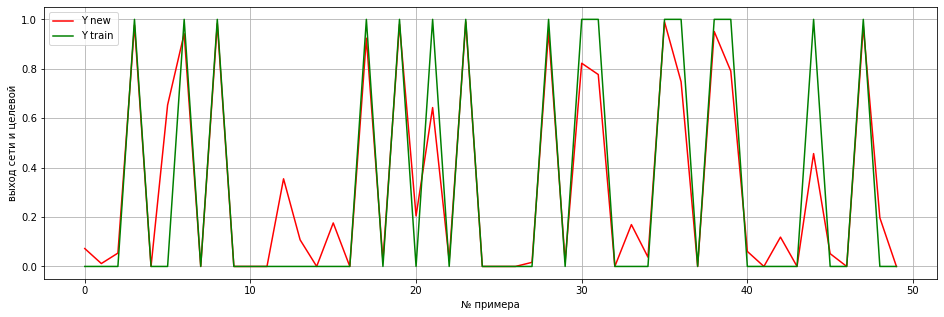

Аккуратность нейронной сети на тесте 85.41%


In [42]:
errors, accuracy, layer2, w0, w1 = fit(2, 0.05, 10000)
demonstration(errors, accuracy, layer2)

predict(X_test, w0, w1)

errors, accuracy, layer2, w0, w1 = fit(2, 0.05, 20000)
demonstration(errors, accuracy, layer2)

predict(X_test, w0, w1)

errors, accuracy, layer2, w0, w1 = fit(2, 0.05, 30000)
demonstration(errors, accuracy, layer2)

predict(X_test, w0, w1)

errors, accuracy, layer2, w0, w1 = fit(2, 0.05, 40000)
demonstration(errors, accuracy, layer2)

predict(X_test, w0, w1)

### ВЫВОДЫ

1. Количество нейронов

При увеличении количества нейронов в скрытом слое, точность увеличивается, соответственно при уменьшении она уменьшается. Но данное изменение будет влиять на скорость расчета модели, тк очень большое количество нейронов создаст большуб нагрузку на оборудование.

2. Скорость коррекции (n)

При уменьшении скорости точность снижается, но это справедливо при одинаковом количестве эпох, тк если при этом менять количество эпох, то можно достигнуть хорошей точности и при низкой скорости коррекции.

3. Количество эпох

При увеличении количества эпох точность растет.

Сильнее всех точность увеличивать при увеличении количества нейронов, при измении других параметров точность росла, но не так быстро.
